<a href="https://colab.research.google.com/github/grkmkcgl/globalai_bootcamp_project/blob/main/GlobalAI_Project_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Kütüphanelerin import edilmesi**

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

**Dosyaların okunması**

In [ ]:
X_train = pd.read_csv("X_train.csv", compression='gzip')
X_test = pd.read_csv("X_test.csv", compression='gzip')
X_val = pd.read_csv("X_val.csv", compression='gzip')
y_test = pd.read_csv("y_test.csv", compression='gzip')
y_train = pd.read_csv("y_train.csv", compression='gzip')
y_val = pd.read_csv("y_val.csv", compression='gzip')

X_train = np.array(X_train).reshape(-1, 32, 32, 1)
X_test = np.array(X_test).reshape(-1, 32, 32, 1)
X_val = np.array(X_val).reshape(-1, 32, 32, 1)

# CREATING CNN

**Verileri kontrol etme**

In [ ]:
print(f"X_train: {len(X_train)}")
print(f"X_val: {len(X_val)}")
print(f"X_test: {len(X_test)}")
print(f"y_train: {len(y_train)}")
print(f"y_val: {len(y_val)}")
print(f"y_test: {len(y_test)}")

X_train: 6985
X_val: 873
X_test: 874
y_train: 6985
y_val: 873
y_test: 874


In [ ]:
print(X_train[-1:])
print(y_train.head())

[[[[0.        ]
   [0.        ]
   [0.        ]
   ...
   [0.        ]
   [0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]
   [0.        ]
   ...
   [0.        ]
   [0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]
   [0.        ]
   ...
   [0.        ]
   [0.        ]
   [0.        ]]

  ...

  [[0.22352941]
   [0.2627451 ]
   [0.29803922]
   ...
   [0.27843137]
   [0.25882353]
   [0.29803922]]

  [[0.19607843]
   [0.27843137]
   [0.29019608]
   ...
   [0.34509804]
   [0.22352941]
   [0.31372549]]

  [[0.30196078]
   [0.55294118]
   [0.48235294]
   ...
   [0.57254902]
   [0.74509804]
   [0.69803922]]]]
   0
0  5
1  0
2  0
3  4
4  5


In [ ]:
# tf modeline dönüştürme
X_train = tf.stack(X_train)
y_train = tf.stack(y_train)
X_val = tf.stack(X_val)
y_val = tf.stack(y_val)
X_test = tf.stack(X_test)
y_test = tf.stack(y_test)

In [ ]:
# Create model

model = tf.keras.Sequential()

In [ ]:
# Input layers

model.add(tf.keras.layers.Conv2D(32,
                                 kernel_size=(3,3),
                                 strides=(1,1),
                                 padding='same',
                                 activation='relu',
                                 input_shape=(32,32,1)))

model.add(tf.keras.layers.MaxPooling2D((2,2)))

In [ ]:
# Convolution layers

model.add(tf.keras.layers.Conv2D(512,
                                 kernel_size=(3,3),
                                 strides=(1,1),
                                 padding='same',
                                 activation='relu',
                                 ))

model.add(tf.keras.layers.MaxPooling2D((2,2)))

model.add(tf.keras.layers.Conv2D(512,
                                 kernel_size=(3,3),
                                 strides=(1,1),
                                 padding='same',
                                 activation='relu',
                                 ))

In [ ]:
# Flatten layer
model.add(tf.keras.layers.Flatten())

In [ ]:
# Classification 
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))

model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5)) 

In [ ]:
# Output
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [ ]:
# Compile model
model.compile(optimizer = 'adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Fit model
results = model.fit(X_train, y_train,
                    batch_size = 128,
                    epochs=50,
                    validation_data=(X_val, y_val))

Epoch 1/50
55/55 [==============================] - 3s 31ms/step - loss: 1.9445 - accuracy: 0.2826 - val_loss: 1.3727 - val_accuracy: 0.5063
Epoch 2/50
55/55 [==============================] - 1s 27ms/step - loss: 1.4676 - accuracy: 0.4775 - val_loss: 1.0693 - val_accuracy: 0.6438
Epoch 3/50
55/55 [==============================] - 2s 29ms/step - loss: 1.2460 - accuracy: 0.5622 - val_loss: 0.8854 - val_accuracy: 0.7171
Epoch 4/50
55/55 [==============================] - 2s 29ms/step - loss: 1.0632 - accuracy: 0.6371 - val_loss: 0.8985 - val_accuracy: 0.7365
Epoch 5/50
55/55 [==============================] - 2s 28ms/step - loss: 0.9638 - accuracy: 0.6806 - val_loss: 0.7333 - val_accuracy: 0.7675
Epoch 6/50
55/55 [==============================] - 2s 29ms/step - loss: 0.8140 - accuracy: 0.7370 - val_loss: 0.6481 - val_accuracy: 0.7938
Epoch 7/50
55/55 [==============================] - 2s 29ms/step - loss: 0.7126 - accuracy: 0.7671 - val_loss: 0.6124 - val_accuracy: 0.8041
Epoch 8/50
55

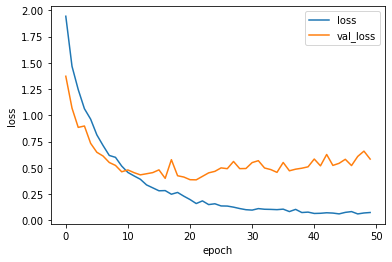

In [ ]:
# Performance (loss)
plt.plot(results.history['loss'], label='loss')
plt.plot(results.history['val_loss'], label='val_loss')
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()

plt.show()

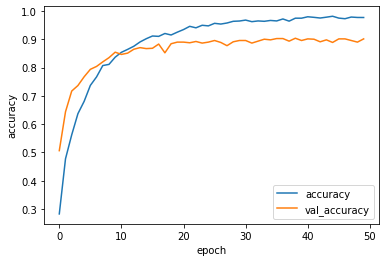

In [ ]:
# Performance (accuracy)
plt.plot(results.history['accuracy'], label='accuracy')
plt.plot(results.history['val_accuracy'], label='val_accuracy')
plt.xlabel("epoch")
plt.ylabel("accuracy")

plt.legend()
plt.show()

In [ ]:
# Evaluation
model.evaluate(X_test, y_test)

28/28 [==============================] - 0s 6ms/step - loss: 0.5027 - accuracy: 0.9062


[0.5026807188987732, 0.9061784744262695]

In [ ]:
# turn numpy 
X_test = np.array(X_test)
y_test = np.array(y_test)

In [ ]:
# Random prediction
prediction_result = model.predict(X_test[113].reshape(1,32,32,1))

predicted_class = prediction_result.argmax()
predicted_probability = prediction_result.max()
print(f"class is: " ,{predicted_class}, "with", {predicted_probability}, "probability")
print("real class is:" + str(y_test[113]))

class is:  {4} with {0.9883422} probability
real class is:[4]


(array([113.,  53., 108.,  86.,  91., 100.,  28., 109., 105.,  81.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

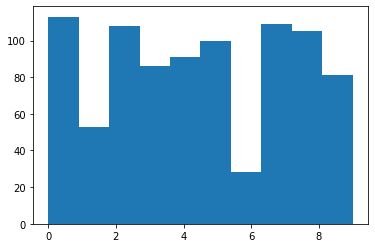

In [ ]:
a = []
for i in range(0,873):
  # Random prediction
  prediction_result = model.predict(X_test[i].reshape(1,32,32,1))

  predicted_class = prediction_result.argmax()
  predicted_probability = prediction_result.max()
  
  if (y_test[i] != predicted_class):
    a.append(y_test[i])

plt.hist(y_test)

In [ ]:
print(a)

[array([1]), array([2]), array([2]), array([2]), array([7]), array([9]), array([9]), array([9]), array([2]), array([5]), array([2]), array([3]), array([0]), array([4]), array([7]), array([2]), array([2]), array([3]), array([2]), array([2]), array([9]), array([5]), array([9]), array([7]), array([4]), array([3]), array([1]), array([4]), array([8]), array([5]), array([8]), array([2]), array([7]), array([1]), array([3]), array([0]), array([9]), array([9]), array([4]), array([4]), array([5]), array([5]), array([8]), array([3]), array([2]), array([2]), array([4]), array([5]), array([3]), array([0]), array([3]), array([9]), array([5]), array([2]), array([7]), array([7]), array([2]), array([5]), array([3]), array([3]), array([5]), array([9]), array([5]), array([2]), array([5]), array([7]), array([8]), array([1]), array([0]), array([2]), array([1]), array([5]), array([2]), array([3]), array([2]), array([3]), array([7]), array([9]), array([2]), array([2]), array([1]), array([3])]
